Моделирование движения нескольких частиц (4) в электрическом поле (конденсатора)

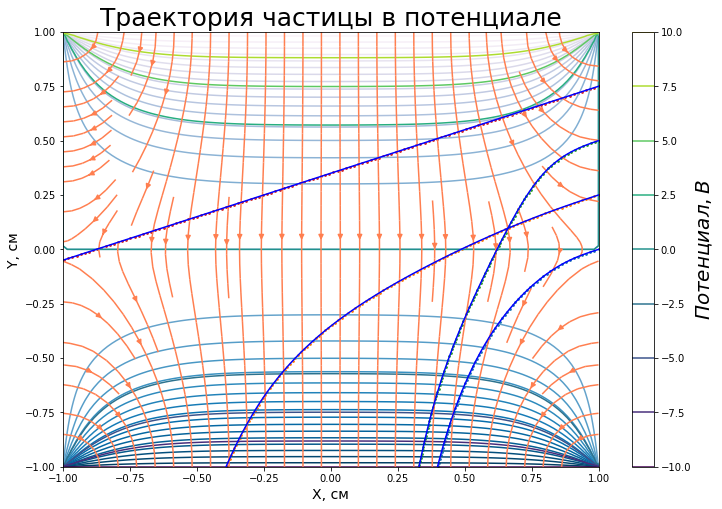

In [32]:
#Текст программы 1:
import numpy as np
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.integrate import odeint
from scipy import interpolate
from matplotlib import ticker, cm


def sub_vect(v, w):
    return [vi - wi for vi, wi in zip(v, w)]

def module(v):
    return (np.sqrt(v @ v))

# создание сетки
N = 120
x, dx = np.linspace(-1, 1, N + 1, retstep=True)
y, dy = np.linspace(-1, 1, N + 1, retstep=True)
xx, yy = np.meshgrid(x , y)

# параметры моделирования
Number_of_Iteration = 1000
Omega = 1
phi = np.zeros((x.size, y.size))
ro = np.zeros((x.size, y.size))
ro[50:-50,50:-50] = 0
phi[:, 0] = 0 
phi[:, -1] = 0  
phi[0, :] = -10
phi[-1, :] = 10 

#расчет потенциала
for i in range(Number_of_Iteration):
    phi[1:-1, 1:-1] = (1 - Omega) * phi[1:-1, 1:-1] + 0.25 * Omega * (phi[:-2, 1:-1] + phi[2:,
    1:-1] + phi[1:-1, 2:] + phi[1:-1, :-2] + dx * dy * ro[1:-1, 1:-1])
    
#расчет напряженности в узлах и между ними (при помощи интерполяции)
Ey, Ex = np.gradient(phi, dx, dy)
Ex = - Ex
Ey = - Ey
Ex_int = interpolate.interp2d(x, y, Ex)
Ey_int = interpolate.interp2d(x, y, Ey)

steps = 150

def calc_motion(s_motion, vel, amplitude_E):
    start_motion = s_motion.copy()
    velocity = vel.copy()
    for i in range(1,steps):
        t = dx / (velocity @ velocity + 0.01)**0.5
        velocity[0] += (amplitude_E * Ex_int(start_motion[i-1, 0], start_motion[i-1, 1])) * t
        velocity[1] += (amplitude_E * Ey_int(start_motion[i-1, 0], start_motion[i-1, 1])) * t
        start_motion[i, 0] = start_motion[i-1, 0] + velocity[0] * t
        start_motion[i, 1] = start_motion[i-1, 1] + velocity[1] * t
    return start_motion

def plot_motion(start_motion, ax):
    ax.scatter(start_motion[:, 0], start_motion[:, 1], s = 3) # График разброса y от x с разным размером и / или цветом маркера.
    tck2, u2 = interpolate.splprep( [start_motion[:, 0], start_motion[:, 1]], s = 0)
    xnew, ynew = interpolate.splev( np.linspace(0,1,800),tck2,der = 0)
    ax.plot(xnew , ynew, '-b', label = 'Траектория частицы')
    
    
fig, ax = plt.subplots(1, 1, figsize = (12,8))
ax.contour(xx, yy, phi, 35, cmap=cm.PuBu_r)
im=plt.contour(xx,yy,phi)
cbar = fig.colorbar(im) # добавление шкалы цвета к графику
cbar.set_label("$Потенциал, В$", fontsize = 20)
ax.set_title("Траектория частицы в потенциале", fontsize = 25)
ax.streamplot(x, y, Ex, Ey, color='coral')
ax.set_xlabel("X, см", fontsize=14)
ax.set_ylabel("Y, см", fontsize=14)
plt.xlim([-1, 1])
plt.ylim([-1, 1])

#начальные скорости и координаты
velocity = np.zeros(2)
velocity[0] = -2.5
velocity[1] = -1
start_motion = np.zeros((steps, 2))
start_motion[0, 0] = 1
start_motion[0, 1] = 0
amplitude_E = [100, 2, 3, 0]

for i in range(4):
    plot_motion(calc_motion(start_motion, velocity, amplitude_E[i]), ax)
    start_motion[0,1] += 0.25
    
plt.show()